# Ecuaciones Diferenciales Parciales (PDEs)

# Introducción

Las ecuaciones diferenciales parciales describen los problemas más interesantes en las ciencias. Algunos problemas que involucran la solución de una ecuación diferencial parcial son las ecuaciones de onda, de difusión, de Laplace, de Maxwell, de Schrödinger; entre otras.

Para evaluar las soluciones de las ecuaciones diferenciales parciales debemos aplicar muchas de las técnicas que hemos estudiado en este curso y existen diversas metodologías. Evaluar dichas soluciones involucra tomar decisiones de como discretizar el problema para implementar métodos numéricos estables.

## Clasificación

Las PDEs se clasifican de manera muy similar a como se clasifican las ecuaciones cónicas de la geometría. Considere la siguiente ecuación:
$$
\alpha x^2 + \beta xy + \gamma y^2 + \delta x + \varepsilon y = f.
$$
Esta ecuación se categoriza de acuerdo al parámetro
$$
\Delta = \beta^2 - 4\alpha\gamma,
$$
de manera tal que tenemos:
1. $\Delta = 0$: la ecuación de una parábola,
3. $\Delta < 0$: la ecuación de una elipse,
2. $\Delta > 0$: la ecuación de una hipérbola.

Para las PDEs, la clasificación se realiza de manera análoga para alguna función $\phi = \phi(x,y)$:
$$
\alpha\frac{\partial^2 \phi}{\partial x^2} + \beta\frac{\partial^2 \phi}{\partial x\partial y} + \gamma\frac{\partial^2 \phi}{\partial y^2} + \delta \frac{\partial\phi}{\partial x} + \varepsilon\frac{\partial\phi}{\partial y} = f,
$$
en la cual definimos $\Delta$ está definido de la misma forma y realizamos la categorización:
1. $\Delta = 0$: PDE parabólica,
3. $\Delta < 0$: PDE elíptica,
2. $\Delta > 0$: PDE hiperbólica.

Estas categorías se utilizan incluso cuando tenemos operadores espaciales, tal que las PDEs describen espacios 4-dimensionales, i.e., $\nabla^2 = \partial_x^2 + \partial_y^2 + \partial_z^2$.

Estas categorías nos permiten aplicar **distintos métodos numéricos dependiendo de que tipo de problema estamos atacando**.

## Algunos ejemplos en la Física
### Ecuación parabólica

La ecuación de difusión es una ecuación canónica en la Física
$$
\kappa \frac{\partial ^2 T}{\partial x^2}  - \frac{\partial T}{\partial t} = 0,
$$
en la cual podemos reconocer los parámetros según nuestra clasificación anterior:
$$
x\to x,\quad y\to t,\quad \alpha \to \kappa,\quad \varepsilon \to - 1,\quad \beta, \gamma, \delta, f \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = 0.
$$

### Ecuación elíptica

Otro ejemplo de la Física de una ecuación elíptic es la ecuación de Poisson, dada por:
$$
\ \nabla^2 \phi = \rho,
$$
en la cual tenemos
$$
x \to x,\quad y\to y,\quad\alpha, \gamma \to 1, f \to \rho, \beta, \delta, \varepsilon \to 0 \quad \Rightarrow \quad \beta^2 - 4\alpha\gamma = -4<0.
$$
Por ejemplo, en electrostática de dos dimensiones con el potencial eléctrico $\phi$, tal que $\vec E = \nabla \phi$, en ausencia de cargas $(\rho \equiv 0)$; obtenemos la ley de Gauss
$$
\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = 0.
$$

### Ecuación hiperbólica

La ecuación de onda es una ecuación hiperbólica:
$$
\ \displaystyle c^2 \frac{\partial ^2 \phi}{\partial x^2}  - \frac{\partial^2 \phi}{\partial t^2} = 0.
$$
En este caso, tenemos
$$
x\to x,\quad y\to t,\quad \alpha \to c^2,\quad \gamma \to - 1,\quad \beta, \delta, \varepsilon, f \to 0 \quad\Rightarrow\quad \beta^2 - 4\alpha\gamma = 4c^2 >0.
$$

# Metodología

La metodología general se base en discretizar el sistema espacial y temporalmente con base en algún método, e.g., 
* Diferencias finitas,
* Coeficientes espectrales,
* Transformadas de Fourier.

El resultado es un **conjunto de ecuaciones diferenciales ordinarias ODEs acopladas que debemos resolver de alguna forma eficiente**.

* Las derivadas espaciales **dan información acerca de los puntos vecinos (acoplamiento)**.
* Los errores dependen en variables espaciales y temporales, no es poco común obtener comportamiento oscilatorio.

Empecemos con el método de diferencias finitas.

### Diferencias centrales para la segunda derivada

En la clase de Diferencias Finitas; consideramos derivadas de primer orden, sus errores asociados y distintas metodologías. Podemos utilizar diferencias centrales para aproximar también segundas derivadas. El resultado se obtiene al considerar las diferencias centrales para la primera derivada en el punto $x+(h/2)$ y en el punto $x - (h/2)$:
$$
f'(x + h/2) \approx \frac{f(x + h) - f(x)}{h}, \quad f'(x - h/2) \approx \frac{f(x) - f(x - h)}{h}.
$$
Podemos aplicar diferencias centrales una vez más en en la segunda derivada para obtener nuestra aproximación
\begin{align}
f''(x) &\approx \frac{f'(x + h/2) - f'(h - h/2)}{h} \\
&= \frac{[f(x+h) - f(x)]/h - [f(x) - f(x - h)]/h}{h} \\
&= \frac{f(x + h) - 2f(x) + f(x - h)}{h^2}.
\end{align}

## Ecuaciones diferenciales parciales elípticas

Nuestro primer caso de estudio será sobre ecuaciones de clase elípticas donde tenemos alguna condición de frontera. Como ejemplo de estudio, consideremos la ley de Gauss en dos dimensiones
$$
0 = \nabla^2 \phi  = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2},
$$
en una grilla 2-dimensional cuadrada de lado $a$ con puntos discretos. Las diferencias finitas en este caso toman la forma
\begin{align}
\frac{\partial^2 \phi}{\partial x^2} & \approx \frac{\phi(x+a, y) - 2\phi(x, y)+ \phi(x-a, y)}{a^2},\\
\frac{\partial^2 \phi}{\partial y^2} & \approx \frac{\phi(x, y+a) - 2\phi(x, y)+ \phi(x, y-a)}{a^2}.
\end{align}
Con esta discretización, la ley de Gauss toma una forma particular, dada por 
$$
0 \approx \phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) - 4\phi(x, y)
$$
en cada punto (x, y). La idea es que cada punto de la grilla satisfaga esta ecuación discreta sujeta a condiciones de frontera o a alguna otra condición de estado.

Dicho esto, consideramos una serie de ecuaciones de la forma
$$
\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a) - 4\phi(x, y) = 0
$$
bajo alguna condición de frontera. 

* Las condiciones de frontera pueden involucrar a los puntos $x$ y $y$ o a sus derivadas $\partial\phi/\partial \xi$ ($\xi = x,\ y,$ o ambas). 
* No es poco común considerar restricción sobre las derivadas como condiciones de frontera
* Si los valores de $\phi$ son conocidos, utilizamos estos valores para la solución
* Si conocemos los valores de frontera de $\partial\phi/\partial \xi$, debemos encontrar relaciones algebraicas entre los puntos cerca de la frontera utilizando diferencias finitas.

Estas ecuaciones se pueden resolver utilizando métodos matriciales $\mathbf L \phi = \mathbf R \phi$ (el tema siguiente de este curso), sin embargo, existen métodos más sencillos. 

### Método de relajación de Jacobi

El método de relajación de Jacobi es el método más sencillo que podemos aplicar para esta ecuación diferencial. 

Este método está basado en el método de relajación que estudiamos para encontrar las raíces de una ecuación no lineal. Basta con reacomodar la ecuación con la forma
$$
\phi'(x, y) = \frac{1}{4}\left[\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)\right],
$$
para poder aplicar el método de relajación. 
* Note que el problema tiene la misma forma que $x = f(x)$, con el cual se puede utilizar el método de relajación. 
* Básicamente, con esta metodología, obtenemos que el nuevo punto de la función en (x, y) es un promedio de la iteración anterior
* Lo único que se debe hacer, es 
  - Fijar $\phi(x, y)$ en los puntos de frontera
  - Considerar valores iniciales: estos valores pueden ser cualquier valor inicial que queramos escoger
  - Aplicar la ecuación anterior a **cada punto de la grilla**
  - Una vez finalizado este procedimiento, los valores obtenidos se vuelven a escoger para la siguiente iteración
  - Se termina cuando se alcanza la convergencia con cierta tolerancia deseada 
* A pesar de que el método de relajación no se puede utilizar para soluciones inestables, **se puede probar que el método de Jacobi siempre converge a una solución estable**
  
### Ejemplo

<div>
<img src="Fig4.png" width="400"/>
</div>

Vamos a resolver la ecuación de Gauss para el campo electrostático en una grilla 2-dimensional utilizando el metodo de relajación de Jacobi. La idea es considerar un problema de electrostática en una placa donde tenemos un potencial $V$ en la sección superior mientras que los otros tres lados están conectados a tierra.

Este problema lo podemos resolver con el método de relajación de Jacobi.

Complete la siguiente función:

In [9]:
import numpy as np

# Esta función toma como argumentos el tamaño lineal de la grilla cuadrada,
# el valor del voltaje en la sección superior de la grilla y la tolerancia de convergencia 
def jacobi_relaxation(M, V, tolerance):
    # Primero creamos los arreglos 2-dimensionales de la grilla
    # Vamos a necesitar dos según la regla de Jacobi
    # Note que usamos M+1, debido a que debemos contener la condición de frontera
    # phi contiene inicialmente los valores iniciales. Vamos a utilizar ceros.
    phi = np.zeros((M + 1, M + 1), dtype=float)
    # Ahora tenemos que colocar la condición inicial.
    # Recuerde accesos de listas en np.ndarray
    phi[0, :] = V
    # phiprime se necesita para la iteración
    phiprime = np.zeros((M + 1, M + 1), dtype=float)
    # Iteración de Jacobi
    delta = 1.0
    its = 0
    while delta > tolerance:
        # Calculamos la iteración
        its += 1
        for i in range(M + 1):
            for j in range(M + 1):
                # Condición de frontera
                if i == 0 or i == M or j == 0 or j == M:
                    phiprime[i, j] = phi[i, j]
                # Iteración principal
                else:
                    #COMPLETE AQUÍ
                    phiprime[i,j] = 0.25*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])
        # Calculamos la diferencia máxima con respecto a los valores anteriores
        delta = np.max(np.abs(phi - phiprime))
        # Ahora intercambiamos los arreglos para la nueva iteración
        # El nuevo phi es el phiprime
        temp = phi
        phi = phiprime
        # El nuevo phiprime es el phi viejo
        phiprime = temp
        
    return phi, its

Realicemos el cálculo con un valor $V = 1$, $M = 100$ y toleracia de $10^{-5}$:

In [16]:
import time
start_time = time.time()
jacobi_vals, iterations = jacobi_relaxation(100, 1.0, 1e-5)
end_time = time.time()
print(f"Número de iteraciones: {iterations}")
print(f"Tiempo de ejecución: {round(end_time - start_time,3)} segundos")

Número de iteraciones: 6073
Tiempo de ejecución: 30.696 segundos


Y ahora grafiquemos nuestro resultado:

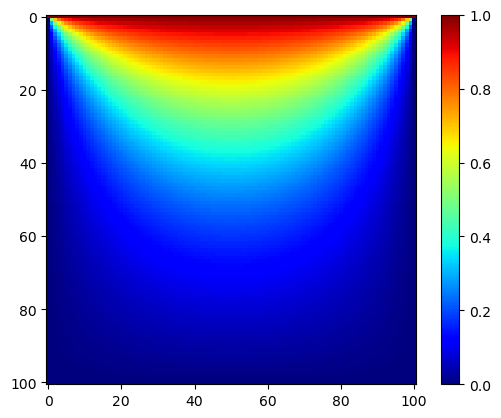

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(jacobi_vals)
plt.colorbar()  
plt.jet()
plt.show()

### Acerca de la aproximación

* Dado que la discretización ocurre con diferencias finitas, el resultado es solamente una aproximación de la solución
* Incluso si escogemos un valor de tolerancia muy pequeño, la solución contiene errores considerables dado que la aproximación de la segunda derivada utilizando diferencias centrales no es muy precisa
* Se pueden utilizar aproximaciones a la derivada de mayor orden a mayor costo computacional
* Otra forma de mejorar la aproximación es mediante el incremento de los puntos de la grilla, para aproximar de mejor manera el problema de la función continua
* Debemos considerar que la aproximación solamente nos da la aproximación en los puntos de la grilla. Si necesitamos los valores en puntos intermedios de las celdas podemos **utilizar interpolación** o, en su defecto, incrementar el número de celdas a mayor costo computacional

### Dificultades

El método de relajación de Jacobi provee soluciones aproximadas de forma correcta, pero tiene un problema grave:
* Es muy lento

Incluso en una grilla de tamaño pequeño con un error relativamente alto, el método requiere muchas iteraciones para converger. 

### Método de relajación de Jacobi modificado (*over-relaxation*)

Existe una forma de mejorar el método de Jacobi para converger con menos iteraciones. Este método es el método de Jacobi modificado, en el cual en lugar de tomar pasos pequeños entre cada iteración, incrementamos con un parámetro $\omega$ el tamaño del incremento que realizamos. Con esta modificación, el método de Jacobi modificado toma la forma 
$$
\phi'(x, y) = (1+\omega)\left[\frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)}4\right] - \omega \phi (x,y).
$$
* Cuando funciona, usualmente reduce el número de iteraciones necesarias para obtener la aproximación
* **No siempre es estable**, depende de como se escoja el parámetro $\omega$
* En general, se debe considerar un parámetro $\omega$ que depende del problema para acelerar el cálculo

### Método de Gauss-Seidel

Existe una optimización muy sencilla que se puede realizar al método de relajación de Jacobi.

En el caso del método de Jacobi, utilizamos los valores antiguos para calcular los valores nuevos. Sin embargo, podemos ir actualizando los valores en los **mismos espacios de memoria para cada iteración**. Asumiendo que los valores nuevos están más cercanos a la solución, esto implica que el número de iteraciones para coverger va a ser menor.

Basta con hacer una simple modificación al algoritmo:
$$
\phi(x, y) \leftarrow \frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)}{4}.
$$
De esta manera, en cada iteración para cada punto de la grilla, se reescriben los valores modificados en el mismo lugar. Se puede probar que esta modificación mejora el número de iteraciones para converger a la solución.

* La diferencia crucial es que no utilizamos $\phi'(x, y)$ en el lado izquierdo de la ecuación iterativa, si no el mismo $\phi(x, y)$
* De esta forma, actualizamos el valor viejo de inmediato, no al final de la iteración total de la grilla
* El método puede ser combinado con el método modificado de Jacobi
* En general, sin embargo, el método modificado de Jacobi puede ser inestable numéricamente, mientras que el de Gauss-Seidel **es siempre estable**. 

El método de Gauss-Seidel modificado se escribe de manera equivalente al de Jacobi
$$
\phi(x, y) \leftarrow (1+\omega)\left[\frac{\phi(x+a, y) + \phi(x-a, y) + \phi(x, y+a) + \phi(x, y-a)}4\right] - \omega \phi (x,y),
$$
con la única diferencia que sustituimos $\phi(x, y)$, en lugar de asociarlo a $\phi'(x, y)$

## Laboratorio

Vamos a poner el método de Gauss-Seidel modificado en prueba.

Complete la siguiente función para incluir la modificación adecuada.

Utilice los mismos parámetros que en el caso anterior y varíe el valor de $\omega$ entre 0.1 y 0.9 para analizar sus resultados. Haga el gráfico del potencial electrostático.

In [19]:
def gauss_seidel_modified(M, V, omega, tolerance):
    # Primero creamos el arreglo 2-dimensionales de la grilla
    # Note que usamos M+1, debido a que debemos contener la condición de frontera
    # phi contiene inicialmente los valores iniciales. Vamos a utilizar ceros.
    phi = np.zeros((M + 1, M + 1), dtype=float)
    # Ahora tenemos que colocar la condición inicial.
    # Recuerde accesos de listas en np.ndarray
    phi[0, :] = V
    # Vamos a guardar una copia para evaluar el error
    phi_copy = phi.copy()
    # Iteración de Gauss-Seidel
    delta = 1.0
    its = 0
    while delta > tolerance:
        # Calculamos la iteración
        its += 1
        for i in range(M + 1):
            for j in range(M + 1):
                # Condición de frontera
                # En este caso, en la frontera los valores no se modifican
                if i == 0 or i == M or j == 0 or j == M:
                    continue
                # Iteración principal
                else:
                    # COMPLETE AQUÍ
                    phi[i,j] = (1+omega)*0.25*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) - omega*phi[i,j]
        # Calculamos la diferencia máxima con respecto a los valores anteriores
        delta = np.max(np.abs(phi - phi_copy))
        # Copiamos los valores de la nueva iteración
        phi_copy = phi.copy()
        
    return phi, its

Número de iteraciones: 3201
Tiempo de ejecución: 25.127 segundos


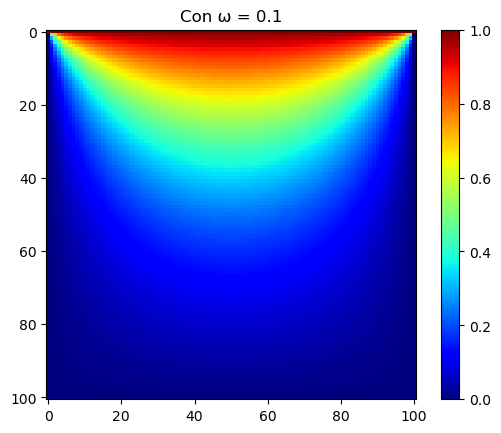

Número de iteraciones: 2742
Tiempo de ejecución: 21.926 segundos


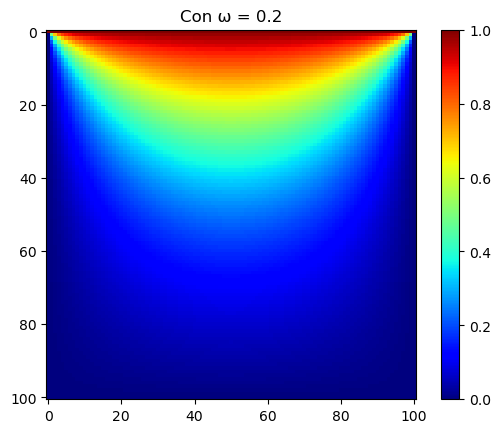

Número de iteraciones: 2326
Tiempo de ejecución: 18.516 segundos


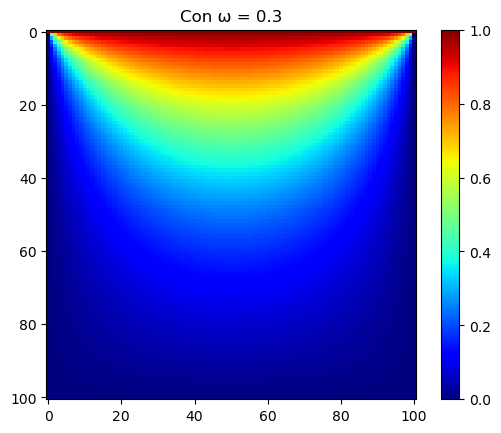

Número de iteraciones: 1946
Tiempo de ejecución: 15.661 segundos


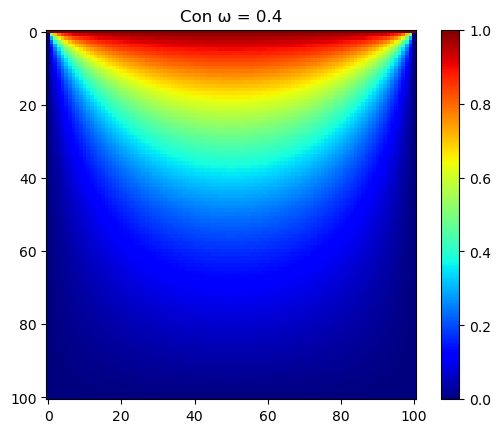

Número de iteraciones: 1592
Tiempo de ejecución: 12.586 segundos


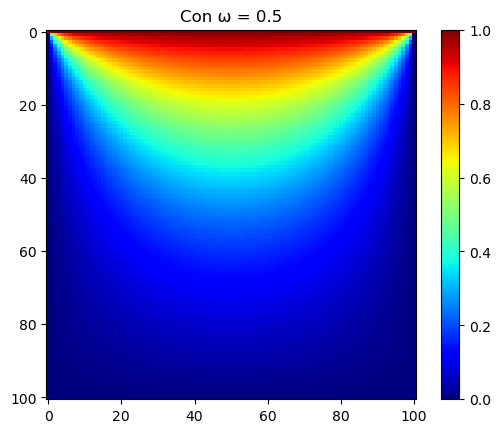

Número de iteraciones: 1260
Tiempo de ejecución: 10.224 segundos


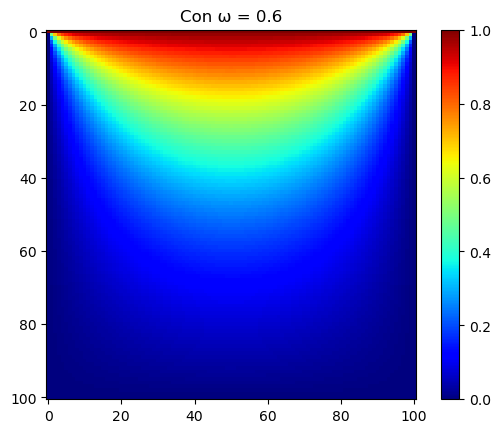

Número de iteraciones: 943
Tiempo de ejecución: 7.653 segundos


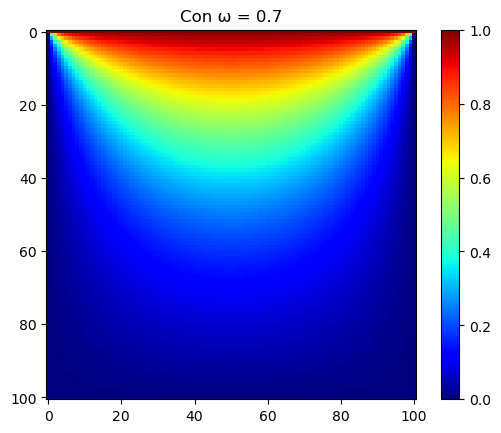

Número de iteraciones: 633
Tiempo de ejecución: 5.165 segundos


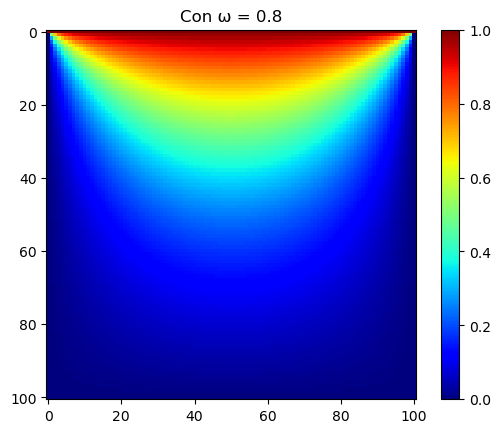

Número de iteraciones: 312
Tiempo de ejecución: 2.548 segundos


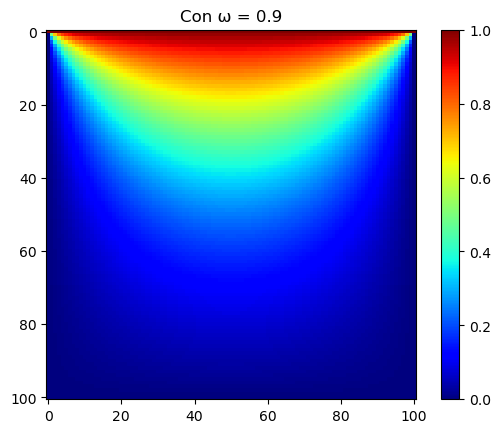

In [27]:
import time
import matplotlib.pyplot as plt
import matplotlib.cm as cm

omega_list = np.arange(0.1, 1.0, 0.1)

for i in range(len(omega_list)):
    start_time = time.time()
    jacobi_vals, iterations = gauss_seidel_modified(100, 1.0,omega_list[i], 1e-5)
    end_time = time.time()
    print(f"Número de iteraciones: {iterations}")
    print(f"Tiempo de ejecución: {round(end_time - start_time,3)} segundos")
    plt.imshow(jacobi_vals)
    plt.colorbar()  
    plt.title(f"Con ω = {round(omega_list[i],1)}") 
    plt.jet()
    plt.show()
